# Introduction

---


In this micro-course, you'll learn about different methods to wrangle and visualize geospatial data, or data with a geographic location.

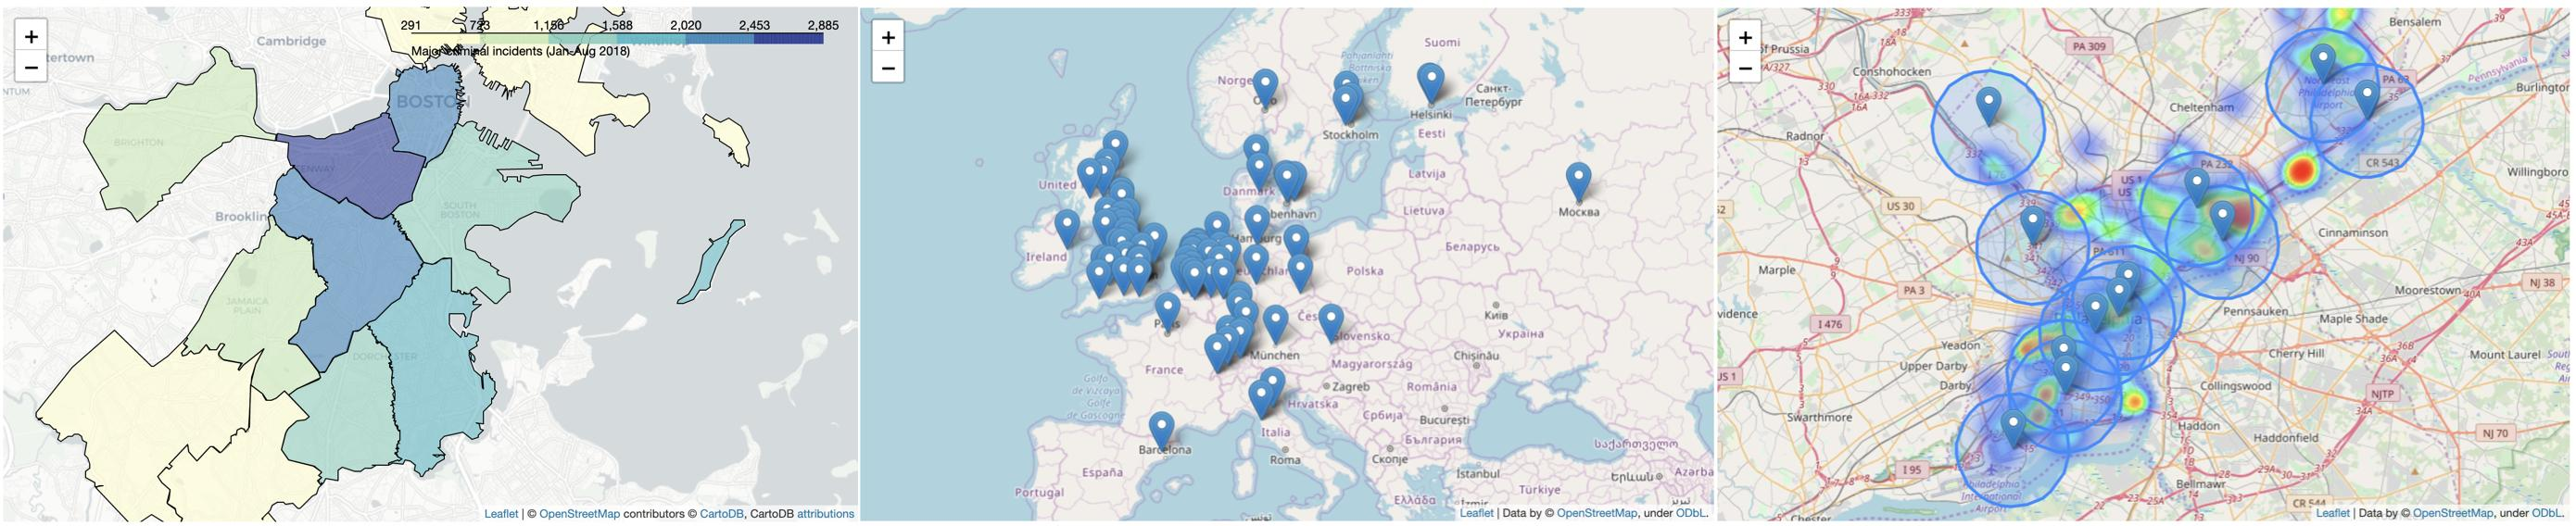

Along the way, you'll offer solutions to several real-world problems like:



*   Where should a global non-profit expand its reach in remote areas of the Philippines?

*   How do purple martins, a threatened bird species, travel between North and South America? Are the birds travelling to conservation areas?

*   Which areas of Japan could potentially benefit from extra earthquake reinforcement?

*   Which Starbucks stores in California are strong candidates for the next Starbucks Reserve Roastery location?

*   Does New York City have sufficient hospitals to respond to motor vehicle collisions? Which areas of the city have gaps in coverage?

You'll also visualize crime in the city of Boston, examine health facilities in Ghana, explore top universities in Europe, and track releases of toxic chemicals in the United States.

In this first tutorial, we'll quickly cover the pre-requisites that you'll need to complete this micro-course. And, if you'd like to review more deeply, we recommend the Pandas micro-course.

We'll also get started with visualizing our first geospatial dataset!

# Reading data

---


The first step is to read in some geospatial data! To do this, we'll use the [GeoPandas](http://geopandas.org/) library.

In [2]:
!pip install geopandas

     |████████████████████████████████| 1.0 MB 5.2 MB/s 
     |████████████████████████████████| 6.3 MB 47.8 MB/s 
     |████████████████████████████████| 15.4 MB 44.7 MB/s 


In [3]:
import geopandas as gpd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!unzip -uq "/content/drive/MyDrive/geospatial_data/archive.zip" -d "dataset_main"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Read in the data
full_data = gpd.read_file("/content/dataset_main/DEC_lands/DEC_lands/DEC_lands.shp")

# View the first five rows of the data
full_data.head()

,OBJECTID,CATEGORY,UNIT,FACILITY,CLASS,UMP,DESCRIPTIO,REGION,COUNTY,URL,SOURCE,UPDATE_,OFFICE,ACRES,LANDS_UID,GREENCERT,SHAPE_AREA,SHAPE_LEN,geometry
0,1,FOR PRES DET PAR,CFP,HANCOCK FP DETACHED PARCEL,WILD FOREST,None,DELAWARE COUNTY DETACHED PARCEL,4,DELAWARE,http://www.dec.ny.gov/,DELAWARE RPP,5/12,STAMFORD,738.620192,103,N,2.990365e+06,7927.662385,"POLYGON ((486093.245 4635308.586, 486787.235 4..."
1,2,FOR PRES DET PAR,CFP,HANCOCK FP DETACHED PARCEL,WILD FOREST,None,DELAWARE COUNTY DETACHED PARCEL,4,DELAWARE,http://www.dec.ny.gov/,DELAWARE RPP,5/12,STAMFORD,282.553140,1218,N,1.143940e+06,4776.375600,"POLYGON ((491931.514 4637416.256, 491305.424 4..."
2,3,FOR PRES DET PAR,CFP,HANCOCK FP DETACHED PARCEL,WILD FOREST,None,DELAWARE COUNTY DETACHED PARCEL,4,DELAWARE,http://www.dec.ny.gov/,DELAWARE RPP,5/12,STAMFORD,234.291262,1780,N,9.485476e+05,5783.070364,"POLYGON ((486000.287 4635834.453, 485007.550 4..."
3,4,FOR PRES DET PAR,CFP,GREENE COUNTY FP DETACHED PARCEL,WILD FOREST,None,None,4,GREENE,http://www.dec.ny.gov/,GREENE RPP,5/12,STAMFORD,450.106464,2060,N,1.822293e+06,7021.644833,"POLYGON ((541716.775 4675243.268, 541217.579 4..."
4,6,FOREST PRESERVE,AFP,SARANAC LAKES WILD FOREST,WILD FOREST,SARANAC LAKES,None,5,ESSEX,http://www.dec.ny.gov/lands/22593.html,"DECRP, ESSEX RPP",12/96,RAY BROOK,69.702387,1517,N,2.821959e+05,2663.909932,"POLYGON ((583896.043 4909643.187, 583891.200 4..."


In [ ]:
!pip install nbmerge



In [ ]:
!nbmerge '/content/1-your-first-map.ipynb' '/content/2-coordiante_reference_systems.ipynb' '/content/3-interactive-maps.ipynb' '/content/4-manipulating-geospatial-data.ipynb' '/content/5-proximity-analysis.ipynb' > 'content/merged.ipynb'

/bin/bash: content/merged.ipynb: No such file or directory


In [8]:
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster
import sys

In [4]:
data = gpd.read_file("/content/crime.csv")
data.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location,geometry
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,,02/09/2018 13:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.35779134,-71.13937053,"(42.35779134, -71.13937053)",None
1,I182070943,1402,Vandalism,VANDALISM,C11,347,,21/08/2018 00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.30682138,-71.06030035,"(42.30682138, -71.06030035)",None
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,,03/09/2018 19:27,2018,9,Monday,19,Part Three,CAZENOVE ST,42.34658879,-71.07242943,"(42.34658879, -71.07242943)",None
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,,03/09/2018 21:16,2018,9,Monday,21,Part Three,NEWCOMB ST,42.33418175,-71.07866441,"(42.33418175, -71.07866441)",None
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,,03/09/2018 21:05,2018,9,Monday,21,Part Three,DELHI ST,42.27536542,-71.09036101,"(42.27536542, -71.09036101)",None


In [9]:
sys.setrecursionlimit(10000)

In [26]:
#!pip install geoplot
import geoplot
import geoplot.crs as gcrs
import numpy as np


In [ ]:
data['Long'] = data['Long'].astype('float')
data['Lat'] = data['Lat'].astype('float')

In [ ]:
hey = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data.Long, data.Lat))
hey.geometry.head().x

In [ ]:
ax = geoplot.kdeplot(data[['Lat','Long']], projection=gcrs.AlbersEqualArea())

# Add polygons
geoplot.polyplot(data, ax=ax)

In [ ]:
geoplot.kdeplot(data,projection=gcrs.AlbersEqualArea(), cmap='Reds', shade=True, shade_lowest=True)

In [ ]:
# Create a base map
m_5 = folium.Map(location=[42.32,-71.0589], tiles='cartodbpositron', zoom_start=12)


# Add a heatmap to the base map
HeatMap(data=data[['Lat', 'Long']], radius=10).add_to(m_5)

# Display the map
m_5